In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [44]:
data = pd.read_csv("engine_data.csv")

In [45]:
print(data.head())

   Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         700          2.493592      11.790927          3.178981   
1         876          2.941606      16.193866          2.464504   
2         520          2.961746       6.553147          1.064347   
3         473          3.707835      19.510172          3.727455   
4         619          5.672919      15.738871          2.052251   

   lub oil temp  Coolant temp  Engine Condition  
0     84.144163     81.632187                 1  
1     77.640934     82.445724                 0  
2     77.752266     79.645777                 1  
3     74.129907     71.774629                 1  
4     78.396989     87.000225                 0  


In [46]:
correlation_matrix = data.corr()

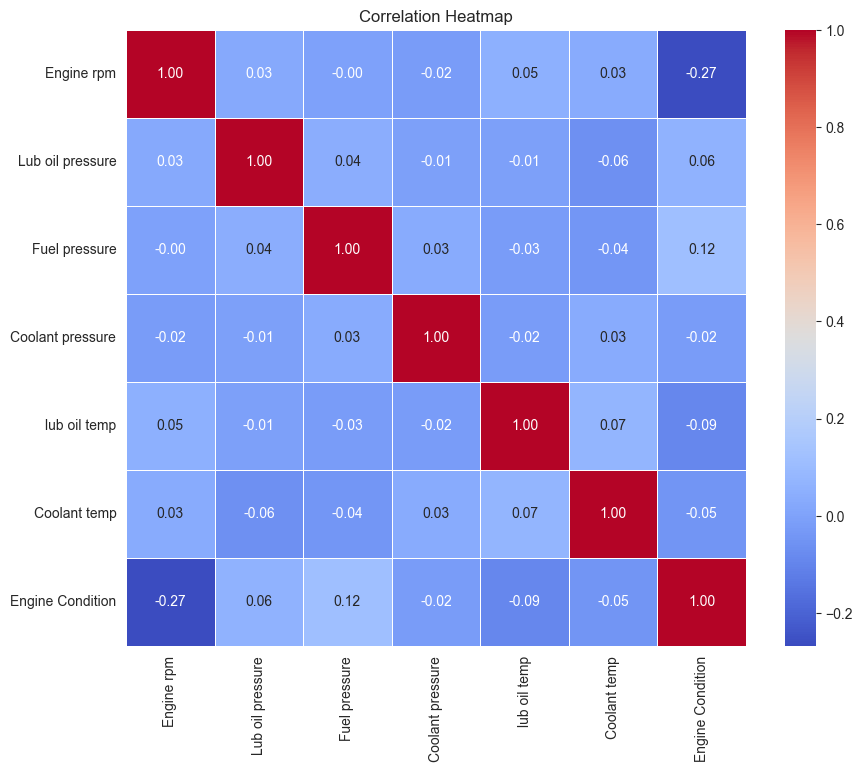

In [47]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [48]:
X = data.drop(columns=['Engine Condition'])
y = data['Engine Condition']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [50]:
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

In [51]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.29      0.39      1444
           1       0.68      0.88      0.77      2463

    accuracy                           0.66      3907
   macro avg       0.63      0.58      0.58      3907
weighted avg       0.64      0.66      0.63      3907

Accuracy: 0.6613770156130023


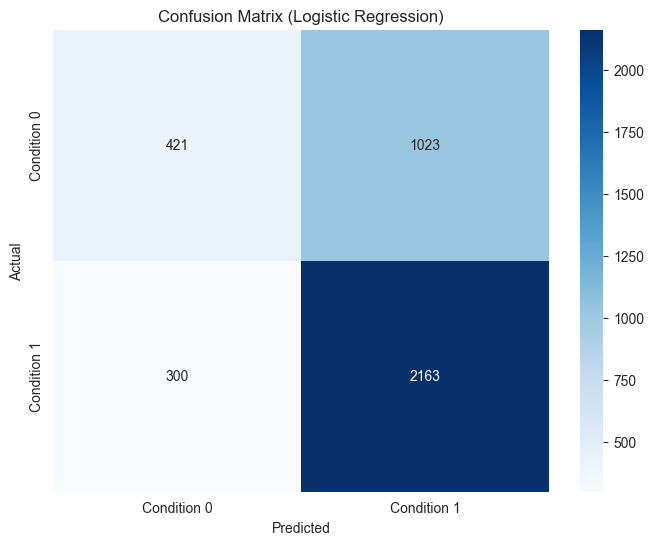

In [52]:
conf_matrix = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Condition 0", "Condition 1"], yticklabels=["Condition 0", "Condition 1"])
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [53]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [54]:
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.19      0.29      1444
           1       0.66      0.92      0.77      2463

    accuracy                           0.65      3907
   macro avg       0.62      0.55      0.53      3907
weighted avg       0.63      0.65      0.59      3907

Accuracy: 0.6496032761709751


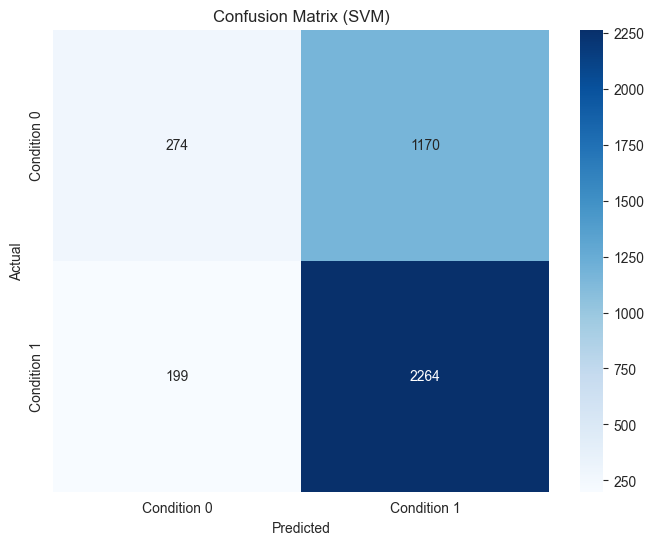

In [55]:
conf_matrix = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Condition 0", "Condition 1"], yticklabels=["Condition 0", "Condition 1"])
plt.title("Confusion Matrix (SVM)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [56]:
# KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [57]:
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.39      0.44      1444
           1       0.68      0.76      0.72      2463

    accuracy                           0.62      3907
   macro avg       0.59      0.58      0.58      3907
weighted avg       0.61      0.62      0.61      3907

Accuracy: 0.6240081904274379


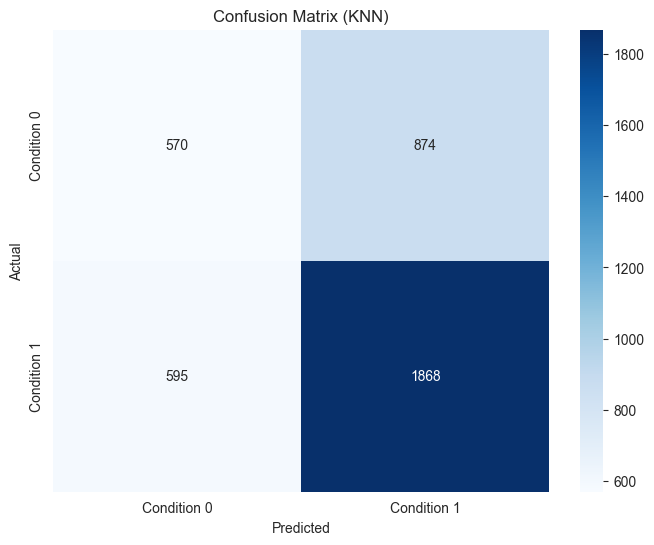

In [58]:
conf_matrix = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Condition 0", "Condition 1"], yticklabels=["Condition 0", "Condition 1"])
plt.title("Confusion Matrix (KNN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [59]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [60]:
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.44      0.44      1444
           1       0.67      0.68      0.68      2463

    accuracy                           0.59      3907
   macro avg       0.56      0.56      0.56      3907
weighted avg       0.59      0.59      0.59      3907

Accuracy: 0.5899667263885334


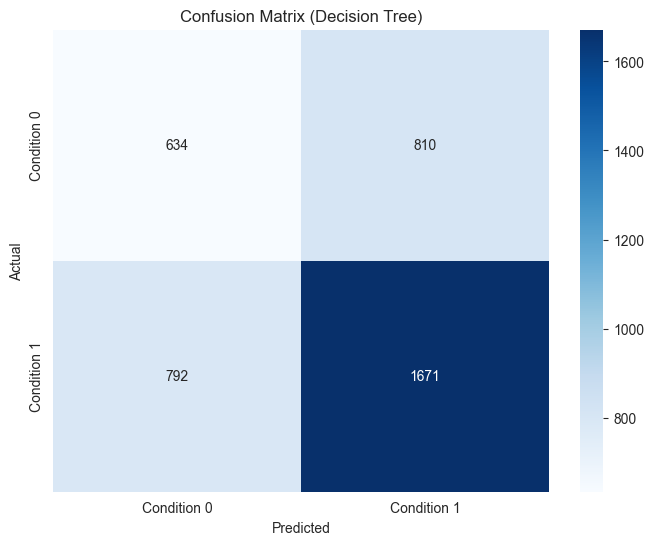

In [61]:
conf_matrix = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Condition 0", "Condition 1"], yticklabels=["Condition 0", "Condition 1"])
plt.title("Confusion Matrix (Decision Tree)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [62]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [63]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.38      0.44      1444
           1       0.69      0.80      0.74      2463

    accuracy                           0.65      3907
   macro avg       0.61      0.59      0.59      3907
weighted avg       0.63      0.65      0.63      3907

Accuracy: 0.6452521115945739


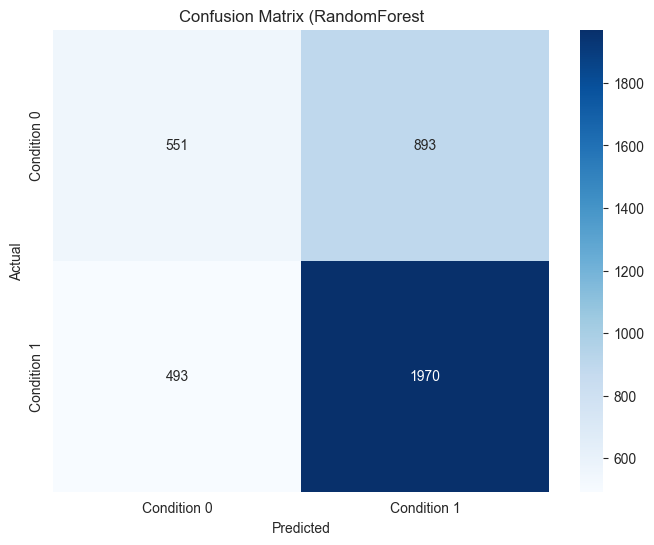

In [64]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Condition 0", "Condition 1"], yticklabels=["Condition 0", "Condition 1"])
plt.title("Confusion Matrix (RandomForest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [65]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [66]:
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_gb))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.36      0.44      1444
           1       0.69      0.84      0.76      2463

    accuracy                           0.66      3907
   macro avg       0.63      0.60      0.60      3907
weighted avg       0.65      0.66      0.64      3907

Accuracy: 0.6647043767596621


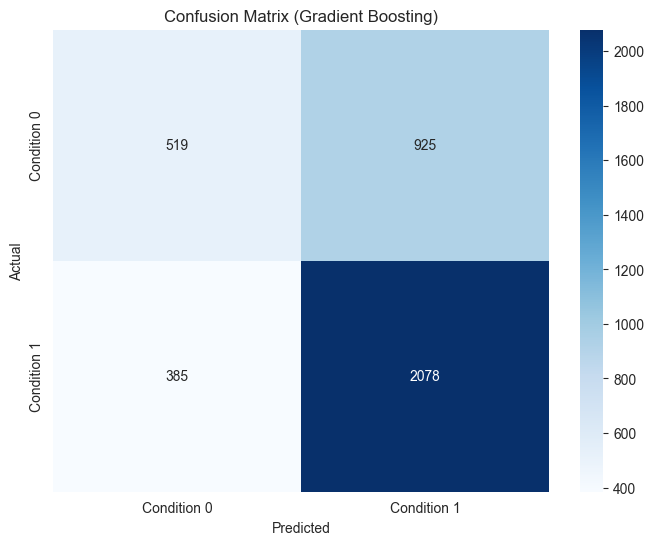

In [67]:
conf_matrix = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Condition 0", "Condition 1"], yticklabels=["Condition 0", "Condition 1"])
plt.title("Confusion Matrix (Gradient Boosting)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [68]:
num_classes = y_train.nunique()

In [69]:
xgb_model = XGBClassifier(objective='multi:softmax', num_class=num_classes, eval_metric='mlogloss', random_state=42, use_label_encoder=False)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:20:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [70]:
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.40      0.46      1444
           1       0.69      0.79      0.74      2463

    accuracy                           0.65      3907
   macro avg       0.61      0.60      0.60      3907
weighted avg       0.63      0.65      0.64      3907

Accuracy: 0.6493473253135398


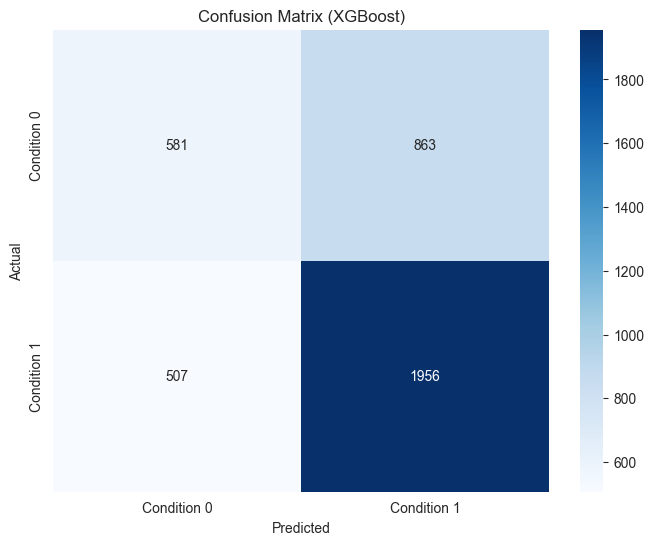

In [71]:
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Condition 0", "Condition 1"], yticklabels=["Condition 0", "Condition 1"])
plt.title("Confusion Matrix (XGBoost)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()